In [3]:
%matplotlib inline
import pandas
traindata = pandas.read_csv("train.csv")
#db.describe
traindata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
testdata = pandas.read_csv("test.csv")
testdata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
traindata.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60

In [6]:
#all data combining train and test
all_data = pandas.concat((traindata.loc[:,'MSSubClass':'SaleCondition'],
                      testdata.loc[:,'MSSubClass':'SaleCondition']))

In [7]:
# Check for duplications
idsUnique = len(set(traindata.Id))
idsTotal = traindata.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

# Drop Id column
traindata.drop("Id", axis = 1, inplace = True)

There are 0 duplicate IDs for 1460 total entries


In [8]:
Y_train = traindata.SalePrice
X_train = traindata.loc[:,'MSSubClass':'SaleCondition']
X_test = testdata.loc[:,'MSSubClass':'SaleCondition']
#X_test.describe

Here I wonder if I should fill the null values with the mean or should I just drop then since there are columns with more than 1000 null values

In [9]:
#check for missing values:
pandas.isnull(traindata).any()
#pandas.isnull(traindata).sum()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [10]:
#filling in missing numbers with the mean
traindata.fillna(traindata.mean())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.000000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.000000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,70.049958,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.000000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.000000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Look at the distribution of SalePrice(Y_train)

In [11]:
Y_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

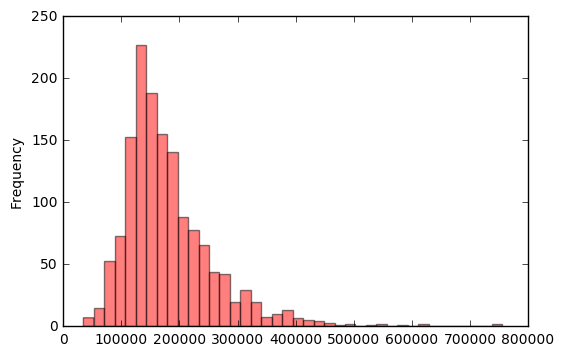

In [12]:
Y_train.plot.hist(color='r',alpha=0.5,bins=40)

Some people deal with the skewness by taking log(feature+1)

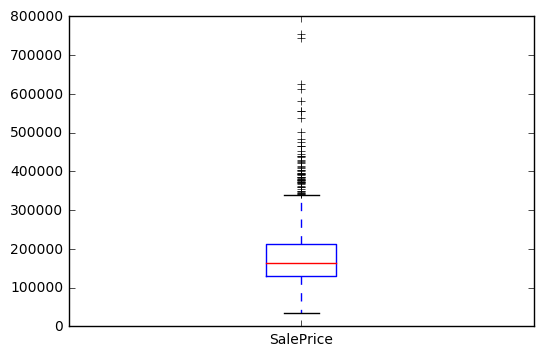

In [13]:
Y_train.plot.box()

In [39]:
import random
import numpy as np
data = list(Y_train)
rand= random.sample(data, 200) 
max_value = max(rand)
min_value = min(rand)
avg_value = sum(rand)/len(rand)
#std = 
print("count", len(rand))
print("max ",max_value)
print("min ",min_value)
print("avg ",avg_value)
print("std ",np.std(rand))

count 200
max  556581
min  34900
avg  188188.86
std  82734.7008815


(array([  1.,  11.,  16.,  27.,  49.,  22.,  20.,  15.,   8.,   8.,   6.,
          2.,   3.,   2.,   2.,   0.,   2.,   1.,   2.,   3.]),
 array([  55000.,   75575.,   96150.,  116725.,  137300.,  157875.,
         178450.,  199025.,  219600.,  240175.,  260750.,  281325.,
         301900.,  322475.,  343050.,  363625.,  384200.,  404775.,
         425350.,  445925.,  466500.]),
 <a list of 20 Patch objects>)

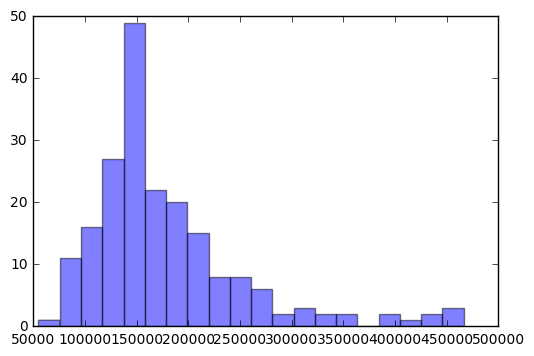

In [15]:
from matplotlib import pyplot as plt
plt.hist(rand, bins=20, alpha=0.5)

(array([ 133.,   39.,    9.,    6.]),
 array([100000, 200000, 300000, 400000, 500000]),
 <a list of 4 Patch objects>)

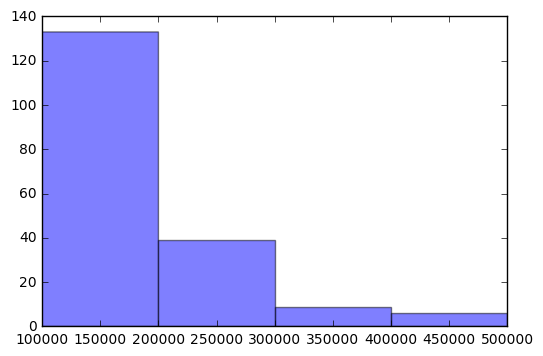

In [22]:
plt.hist(rand, bins=[100000, 200000, 300000, 400000, 500000],alpha=0.5)

Finding the Correlation between the X components 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr = traindata.select_dtypes(include = ['float64','int64']).iloc[:,1:].corr()
corr.head

<bound method NDFrame.head of                LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.426095     0.251646    -0.059213   0.123349   
LotArea           0.426095  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.251646  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.059213 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.123349  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.088866  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.193458  0.104160     0.411876    -0.128101   0.315707   
BsmtFinSF1        0.233633  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2        0.049900  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.132644 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.392075  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.457181  0.299475     0.476

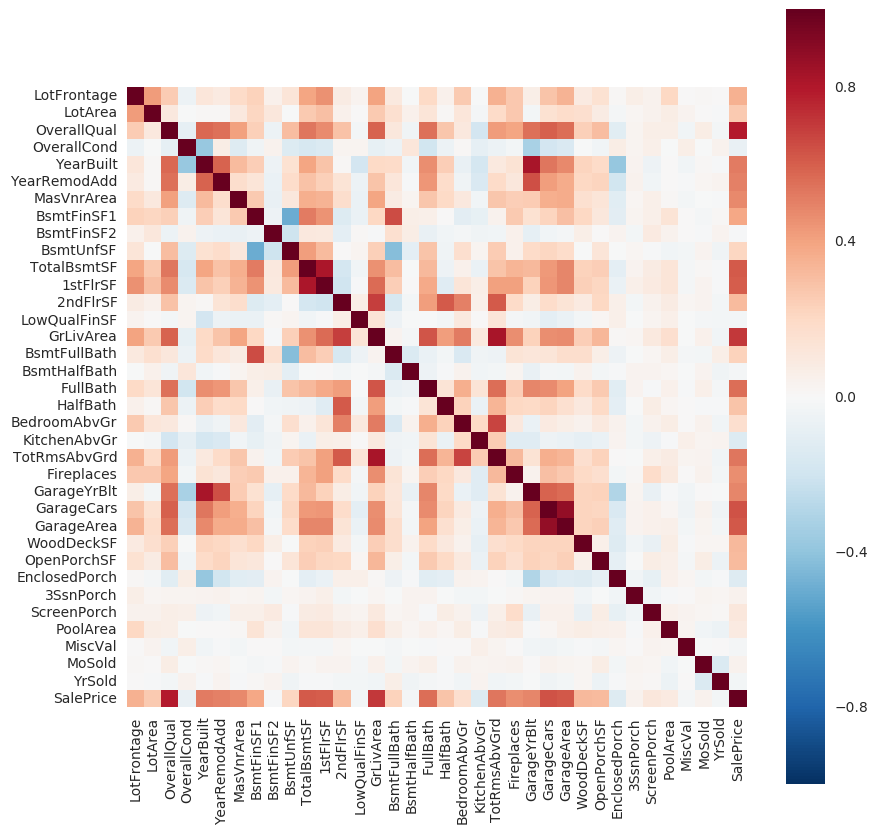

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=1,square=True)

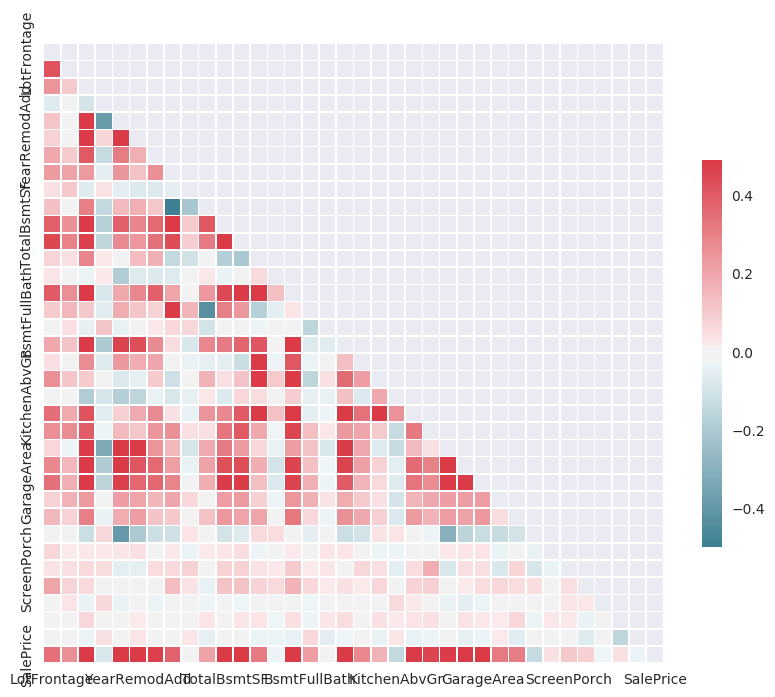

In [14]:
import numpy as np
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [15]:
corrTosal = corr.SalePrice
#corrTosal.head
plt.rcParams['figure.figsize']=(15,10)

In [16]:
#corrTosal.plot.hist(color='r',alpha=0.5,bins=10)

Models to tryout: Ridge, Lasso, XGBoost, RandomForest, Regression Tree 

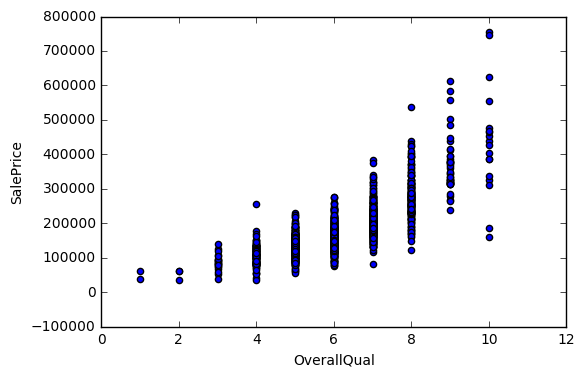

In [10]:
#A=traindata.OverallQual
#B=traindata.SalePrice
traindata.plot.scatter(x="OverallQual",y="SalePrice")

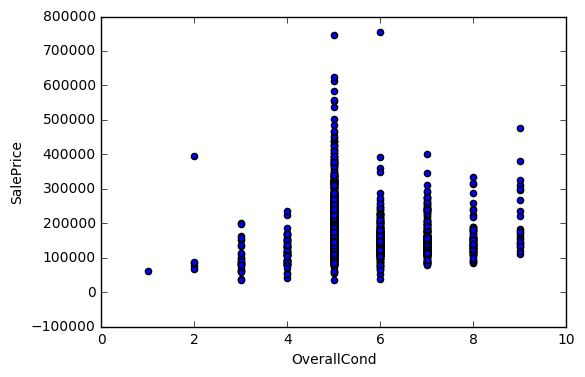

In [11]:
traindata.plot.scatter(x="OverallCond",y="SalePrice")